## UAS

Ikhtiar Hidayatullah (200411100180)
Denny Wahyudi Ramadhon (200411100170)

## Get and prepare Data

https://github.com/tiarh/kelompokpro

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_data = pd.read_csv('https://raw.githubusercontent.com/tiarh/data/main/ANTM.JK.csv')
df_data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-15,2180.0,2240.0,2120.0,2170.0,2170.0,94872500
1,2022-06-16,2200.0,2230.0,2140.0,2150.0,2150.0,99487000
2,2022-06-17,2120.0,2140.0,2100.0,2110.0,2110.0,70818600
3,2022-06-20,2110.0,2130.0,2050.0,2070.0,2070.0,78282700
4,2022-06-21,2080.0,2150.0,2070.0,2150.0,2150.0,83298700
5,2022-06-22,2140.0,2140.0,2020.0,2020.0,2020.0,171508200
6,2022-06-23,2020.0,2020.0,1955.0,1965.0,1965.0,127468500


In [3]:
df_data.shape

(247, 7)

In [4]:
df_close= df_data['Close']

In [5]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## tuning data

In [6]:
n_steps = 5
X, y = split_sequence(df_close, n_steps)

In [7]:
print(X.shape, y.shape)

(242, 5) (242,)


In [8]:
n_steps = 5
X, y = split_sequence(df_close, n_steps)  # column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-' + str(i) for i in range(n_steps-1, -1, -1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [9]:
print(X.shape, y.shape)

(242, 5) (242,)


In [10]:
# df_X.head()
# df_y.head()
df.head(5)

,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,2170.0,2150.0,2110.0,2070.0,2150.0,2020.0
1,2150.0,2110.0,2070.0,2150.0,2020.0,1965.0
2,2110.0,2070.0,2150.0,2020.0,1965.0,1970.0
3,2070.0,2150.0,2020.0,1965.0,1970.0,1890.0
4,2150.0,2020.0,1965.0,1970.0,1890.0,1865.0


## Plotting

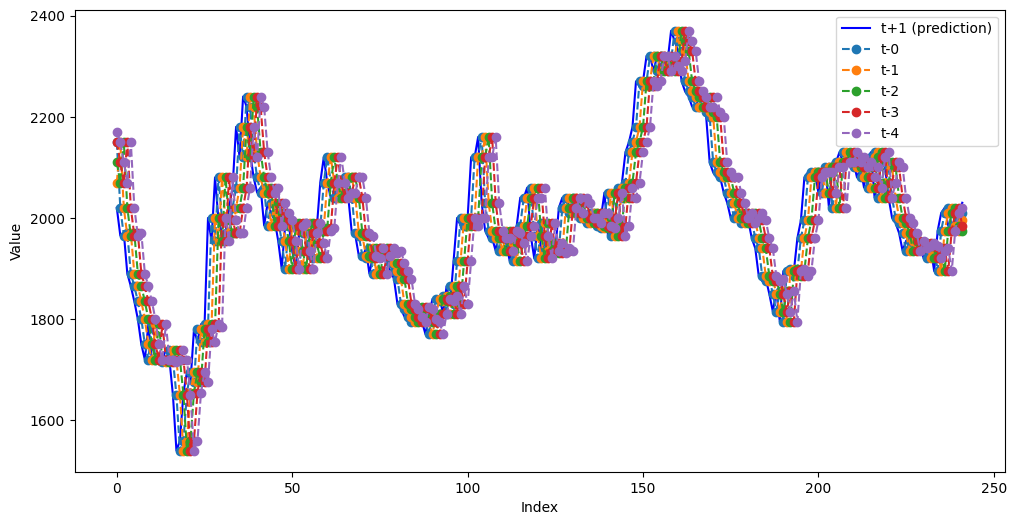

In [11]:
import matplotlib.pyplot as plt

# Membuat subplot dengan lebar sumbu x yang lebih besar
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
ax.plot(df.index, df['t+1 (prediction)'], label='t+1 (prediction)', linestyle='-', color='blue')
for i in range(n_steps):
    ax.plot(df.index, df['t-' + str(i)], label='t-' + str(i), linestyle='--', marker='o')

ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.legend()
plt.show()


## Preprocessing

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [13]:
X_norm

array([[0.75903614, 0.73493976, 0.68674699, 0.63855422, 0.73493976],
       [0.73493976, 0.68674699, 0.63855422, 0.73493976, 0.57831325],
       [0.68674699, 0.63855422, 0.73493976, 0.57831325, 0.51204819],
       ...,
       [0.52409639, 0.56626506, 0.57831325, 0.53614458, 0.52409639],
       [0.56626506, 0.57831325, 0.53614458, 0.52409639, 0.54819277],
       [0.57831325, 0.53614458, 0.52409639, 0.54819277, 0.56626506]])

## Split Data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

## model knn


In [15]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=7)

## Fit & Predict KNN

In [16]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

## mse

$$ \text{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2$$

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2427.9362765514365

## result

In [18]:
y_test.shape

(49,)

In [19]:
y_pred.shape

(49,)

## MAPE

In [20]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.018567619687343655

In [21]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

36.253644314868815

## Naive Bayes Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# Create a Naive Bayes
naive_bayes = GaussianNB()

## Fit & Predict Naive Bayes

In [23]:

# Training the model
naive_bayes.fit(X_train, y_train)

# Making predictions on the test set
y_pred = naive_bayes.predict(X_test)


## Plotting the predicted values and actual values

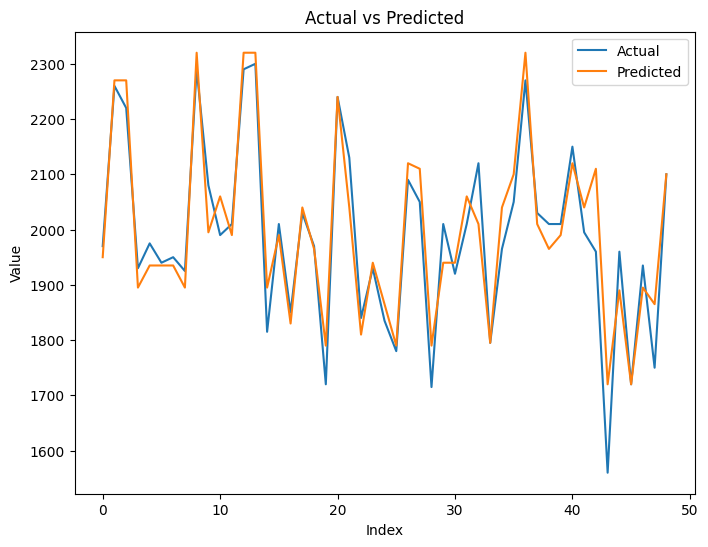

In [24]:
# Plotting the predicted values and actual values
plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Actual')
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## mse

In [25]:
# Calculating MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3229.591836734694


## MAPE

In [26]:
# Calculating MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.0223423426919766


## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Create a Random Forest Regressor
random_forest = RandomForestRegressor()

In [28]:
# Train the model
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

In [29]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 2055.471224489796


In [30]:
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.01721469362614442
